<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool
4. Dropout              - Regularization Technique  
5. Batch Normalization 
6. Image augmentation of random rotation between -5 to +5 degrees

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 
3. StepLR with step size 6 and gamma value 0.1. 

Target: 
======

In this step

1. MNIST Dataset is a simple dataset with very little variation. Hence We may not need a higher batch size for the learning rate we are using . At the same time the rotation of (-7 ,+7) might be slightly higher.
2. Hence I want to make the following changes to it 
    a) Change Batch size from 128 to 64 
    b) Modify rotation from (-7,+7) to (-5,+5)

Result: 
======
1. Observed Train accuracy: 99%
2. Validation accuracy:99.42%
3. Number of parameters: 8,582


Analysis: 
========

1. The Validation accuracy increased to 99.42% 
2. It can also be seen that the accuracy has stabilized towards the last few steps which is a good sign 
3. Now as we have achieved our target accuracy I should try optimizing it further 


In [2]:
from model import model6 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 14, 28, 28]             126
              ReLU-2           [-1, 14, 28, 28]               0
       BatchNorm2d-3           [-1, 14, 28, 28]              28
         Dropout2d-4           [-1, 14, 28, 28]               0
            Conv2d-5           [-1, 14, 28, 28]           1,764
              ReLU-6           [-1, 14, 28, 28]               0
       BatchNorm2d-7           [-1, 14, 28, 28]              28
         Dropout2d-8           [-1, 14, 28, 28]               0
         MaxPool2d-9           [-1, 14, 14, 14]               0
           Conv2d-10           [-1, 14, 14, 14]           1,764
             ReLU-11           [-1, 14, 14, 14]               0
      BatchNorm2d-12           [-1, 14, 14, 14]              28
        Dropout2d-13           [-1, 14, 14, 14]               0
           Conv2d-14           [-1, 14,

G:\TSAI-ERA\Session 7\model.py:355: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader_rotation, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 64
rotation_range = (-5.0, 5.0)
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader_rotation(batch_size, rotation_range, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [11]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.069).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 15):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    scheduler.step()

Currently Executing Epoch: 1


  0%|                                                                                          | 0/938 [00:00<?, ?it/s]G:\TSAI-ERA\Session 7\model.py:355: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=0.10898737609386444 Batch_id=937 Accuracy=93.21: 100%|██████████████████████████| 938/938 [01:23<00:00, 11.26it/s]



Test set: Average loss: 0.0507, Accuracy: 9833/10000 (98.33%)

Currently Executing Epoch: 2


Loss=0.007169264368712902 Batch_id=937 Accuracy=97.54: 100%|█████████████████████████| 938/938 [01:28<00:00, 10.55it/s]



Test set: Average loss: 0.0343, Accuracy: 9885/10000 (98.85%)

Currently Executing Epoch: 3


Loss=0.005951263010501862 Batch_id=937 Accuracy=98.00: 100%|█████████████████████████| 938/938 [01:12<00:00, 12.92it/s]



Test set: Average loss: 0.0308, Accuracy: 9900/10000 (99.00%)

Currently Executing Epoch: 4


Loss=0.008684094063937664 Batch_id=937 Accuracy=98.23: 100%|█████████████████████████| 938/938 [01:13<00:00, 12.81it/s]



Test set: Average loss: 0.0283, Accuracy: 9905/10000 (99.05%)

Currently Executing Epoch: 5


Loss=0.008819496259093285 Batch_id=937 Accuracy=98.46: 100%|█████████████████████████| 938/938 [01:14<00:00, 12.64it/s]



Test set: Average loss: 0.0249, Accuracy: 9920/10000 (99.20%)

Currently Executing Epoch: 6


Loss=0.02076706290245056 Batch_id=937 Accuracy=98.49: 100%|██████████████████████████| 938/938 [01:13<00:00, 12.78it/s]



Test set: Average loss: 0.0249, Accuracy: 9923/10000 (99.23%)

Currently Executing Epoch: 7


Loss=0.02502935379743576 Batch_id=937 Accuracy=98.77: 100%|██████████████████████████| 938/938 [01:13<00:00, 12.84it/s]



Test set: Average loss: 0.0213, Accuracy: 9932/10000 (99.32%)

Currently Executing Epoch: 8


Loss=0.00106463220436126 Batch_id=937 Accuracy=98.88: 100%|██████████████████████████| 938/938 [01:12<00:00, 12.96it/s]



Test set: Average loss: 0.0208, Accuracy: 9937/10000 (99.37%)

Currently Executing Epoch: 9


Loss=0.008960447274148464 Batch_id=937 Accuracy=98.89: 100%|█████████████████████████| 938/938 [01:12<00:00, 12.87it/s]



Test set: Average loss: 0.0207, Accuracy: 9933/10000 (99.33%)

Currently Executing Epoch: 10


Loss=0.005785787478089333 Batch_id=937 Accuracy=98.88: 100%|█████████████████████████| 938/938 [01:14<00:00, 12.63it/s]



Test set: Average loss: 0.0208, Accuracy: 9931/10000 (99.31%)

Currently Executing Epoch: 11


Loss=0.00845811516046524 Batch_id=937 Accuracy=98.91: 100%|██████████████████████████| 938/938 [01:12<00:00, 12.86it/s]



Test set: Average loss: 0.0202, Accuracy: 9933/10000 (99.33%)

Currently Executing Epoch: 12


Loss=0.13588812947273254 Batch_id=937 Accuracy=98.95: 100%|██████████████████████████| 938/938 [01:11<00:00, 13.05it/s]



Test set: Average loss: 0.0199, Accuracy: 9937/10000 (99.37%)

Currently Executing Epoch: 13


Loss=0.1353822648525238 Batch_id=937 Accuracy=99.00: 100%|███████████████████████████| 938/938 [01:12<00:00, 12.88it/s]



Test set: Average loss: 0.0201, Accuracy: 9941/10000 (99.41%)

Currently Executing Epoch: 14


Loss=0.37114205956459045 Batch_id=937 Accuracy=98.99: 100%|██████████████████████████| 938/938 [01:12<00:00, 12.97it/s]



Test set: Average loss: 0.0196, Accuracy: 9942/10000 (99.42%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

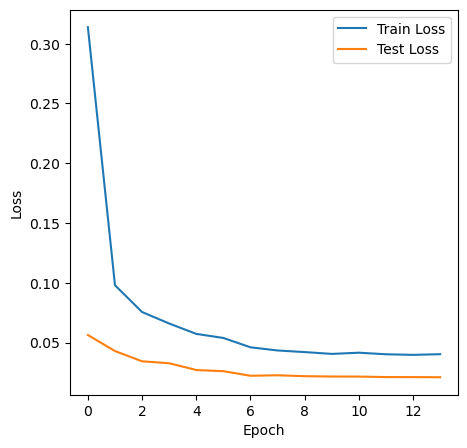

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

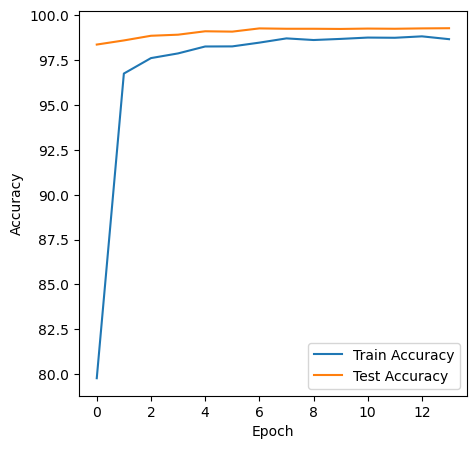

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
